In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D,
    BatchNormalization,
    LeakyReLU,
    MaxPooling2D,
    Flatten,
    Dense,
    Dropout,
    GlobalAveragePooling2D
)
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense
from tensorflow.keras.preprocessing import image
import tensorflow as tf
import numpy as np
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from matplotlib import pyplot as plt
import glob

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D,
    BatchNormalization,
    LeakyReLU,
    MaxPooling2D,
    Flatten,
    Dense,
    Dropout,
    GlobalAveragePooling2D
)
from tensorflow.keras import layers, models
from keras.regularizers import l2

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

import io
import ipywidgets as widgets
from IPython.display import display, clear_output
from PIL import Image
import numpy as np
import tensorflow as tf

import tensorflow as tf

from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt

import os
import shutil
import random

import os
import pandas as pd
from sklearn.model_selection import KFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
# Install the Kaggle API
!pip install kaggle

# Create a Kaggle folder if it doesn't exist
!mkdir -p ~/.kaggle

In [3]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json  # Change permissions

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [5]:
!kaggle datasets download ananthu017/emotion-detection-fer -p /content/ --unzip


Dataset URL: https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer
License(s): CC0-1.0
 98% 64.0M/65.2M [00:03<00:00, 23.6MB/s]
100% 65.2M/65.2M [00:03<00:00, 17.1MB/s]


In [6]:
train_dir = "/content/train/"
test_dir = "/content/test/"

CLASS_NAMES = ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths and parameters
image_shape = (256, 256)  # Resize all images to 224x224
batch_size = 32  # Batch size for loading data

# Initialize ImageDataGenerator for training/validation and test
train_valid_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values to [0, 1]
    rotation_range=20,  # Random rotation
    width_shift_range=0.2,  # Random horizontal shifts
    height_shift_range=0.2,  # Random vertical shifts
    shear_range=0.2,  # Random shearing
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Random horizontal flips
    validation_split=0.125  # 10% out of the 80% data for validation (10/80 = 0.125)
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)  # Only rescaling for test data

# Create training data generator (70% of the total dataset)
print("Training Images:")
train_data = train_valid_datagen.flow_from_directory(
    train_dir,
    target_size=image_shape,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='training'  # Specify training subset (70% of total)
)

# Create validation data generator (10% of the total dataset)
print("Validating Images:")
valid_data = train_valid_datagen.flow_from_directory(
    train_dir,
    target_size=image_shape,

    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    subset='validation'  # Specify validation subset (10% of total)
)

# Create test data generator (20% of the total dataset)
print("Test Images:")
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_shape,

    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Training Images:
Found 25124 images belonging to 7 classes.
Validating Images:
Found 3585 images belonging to 7 classes.
Test Images:
Found 7178 images belonging to 7 classes.


In [8]:
# Map class indices to class names
train_classes = train_data.class_indices
print("Class Indices:", train_classes)

# Extract only class names
CLASS_NAMES = list(train_classes.keys())
print("Class Names:", CLASS_NAMES)


Class Indices: {'angry': 0, 'disgusted': 1, 'fearful': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprised': 6}
Class Names: ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


# Dataset Visualization


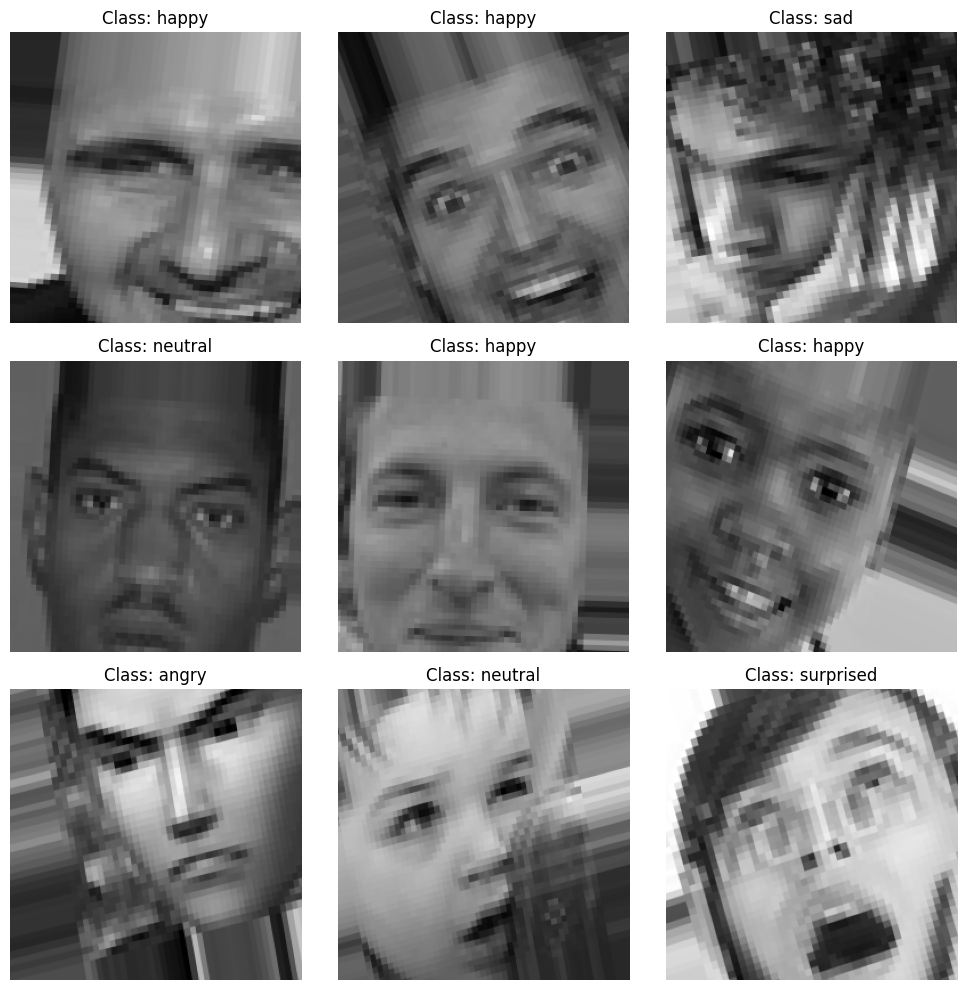

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of training data
images, labels = next(train_data)

# Define the number of images to display
num_images = 9
plt.figure(figsize=(10, 10))

for i in range(num_images):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    # Use np.argmax to get the label index and map it to CLASS_NAMES
    class_index = np.argmax(labels[i])
    plt.title(f"Class: {CLASS_NAMES[class_index]}")  # Display the class name
    plt.axis('off')

plt.tight_layout()
plt.show()


# Modeling


In [ ]:
CONFIGURATION = {
    'BATCH_SIZE':32,
    'IM_SIZE': 256,
    'LEARNING_RATE':0.001,
    'N_EPOCHS': 25,
    'DROPOUT_RATE':0.0,
    'REGULARIZATION_RATE':0.0,
    'N_FILTERS':6,
    'KERNEL_SIZE': 3,
    'N_STRIDES': 1,
    'POOL_SIZE' : 2,
    'N_DENSE_1':100,
    'N_DENSE_2': 10,
    'NUM_CLASSES' : 7
}


# Transfer Learning with Mobilenet




In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

from tensorflow.keras import layers, models
from keras.regularizers import l2

In [31]:
mobilenet = tf.keras.applications.MobileNet(
    input_shape=(256, 256, 3),  # Input shape for the images
    weights='imagenet',         # Load pre-trained weights from ImageNet
    include_top=False           # Exclude the fully connected layers at the top
)


<ipython-input-31-b7fd5c59d270>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet = tf.keras.applications.MobileNet(


In [32]:


for layer in mobilenet.layers:
  layer.trainable = False

In [33]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l2

# Global average pooling to reduce dimensionality
x = GlobalAveragePooling2D()(mobilenet.output)

# # First fully connected block
# x = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(x)
# x = BatchNormalization()(x)
# x = Dropout(0.3)(x)

# # Second fully connected block
# x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)
# x = BatchNormalization()(x)
# x = Dropout(0.3)(x)

# # Third fully connected block
# x = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x)
x = BatchNormalization()(x)
# x = Dropout(0.3)(x)

# Output layer for multi-class classification
x = Dense(7, activation='softmax')(x)


In [34]:
model = Model(
    inputs = mobilenet.input,
    outputs = x
)

In [35]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 128, 128, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 128, 128, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 128, 128, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 128, 128, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 128, 128, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 128, 128, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 129, 129, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 64, 64, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 64, 64, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 64, 64, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 64, 64, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 64, 64, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 64, 64, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 64, 64, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,240,135 (12.36 MB)

 Trainable params: 9,223 (36.03 KB)

 Non-trainable params: 3,230,912 (12.32 MB)

In [36]:
from tensorflow.keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

loss_function = CategoricalCrossentropy()
optimizer = Adam(learning_rate=CONFIGURATION['LEARNING_RATE'])

model.compile(
    optimizer = optimizer,
    loss = loss_function,
    metrics = ['accuracy']
)

In [37]:
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# Callbacks for early stopping and learning rate scheduling
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(lambda epoch: 1e-3 * 0.9 ** epoch)


In [29]:
# Use only 50% of the training dataset
train_data = train_data.take(len(train_data) // 2)

# Prefetch for efficiency
train_data = train_data.prefetch(buffer_size=tf.data.AUTOTUNE)



AttributeError: 'DirectoryIterator' object has no attribute 'take'

In [38]:
# Assuming train_data is a DirectoryIterator or tf.data.Dataset
steps_per_epoch = len(train_data) // 2 // train_data.batch_size  # 50% of the data

# Fit the model
history = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=25,
    steps_per_epoch=30,  # Use only 50% of the data
    # validation_steps=len(valid_data),
    # callbacks=[early_stopping]
)


Epoch 1/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 145s 4s/step - accuracy: 0.1573 - loss: 2.4815 - val_accuracy: 0.1626 - val_loss: 2.1527
Epoch 2/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.2402 - loss: 2.1022 - val_accuracy: 0.2374 - val_loss: 1.8874
Epoch 3/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 88s 3s/step - accuracy: 0.2848 - loss: 2.0047 - val_accuracy: 0.2893 - val_loss: 1.7652
Epoch 4/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 92s 3s/step - accuracy: 0.3001 - loss: 1.9286 - val_accuracy: 0.3144 - val_loss: 1.7481
Epoch 5/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 149s 5s/step - accuracy: 0.3302 - loss: 1.8122 - val_accuracy: 0.3397 - val_loss: 1.6942
Epoch 6/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.3934 - loss: 1.7309 - val_accuracy: 0.3729 - val_loss: 1.6547
Epoch 7/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - accuracy: 0.3811 - loss: 1.7323 - val_accuracy: 0.3721 - val_loss: 1.6379
Epoch 8/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.3632 - loss: 1.7275 - val_accuracy: 0.3766 - val_los

In [ ]:
model.save("Mobilenet_model.keras")

In [ ]:
model = tf.keras.models.load_model('/content/Resnet_model.keras')


Training and Evaluation


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Collect all images and true labels from the test data generator
X_test_all = []
Y_true_all = []
test_data.reset()  # Reset the generator

for _ in range(len(test_data)):
    X_batch, Y_batch = next(test_data)  # Get a batch of data
    X_test_all.append(X_batch)
    Y_true_all.append(Y_batch)

# Concatenate all batches into single arrays
X_test_all = np.concatenate(X_test_all, axis=0)
Y_true_all = np.concatenate(Y_true_all, axis=0)

# Predict on the entire test dataset
Y_pred = model.predict(X_test_all)  # Predictions for the test set
Y_pred_classes = np.argmax(Y_pred, axis=1)  # Convert predicted probabilities to class indices
Y_true_classes = np.argmax(Y_true_all, axis=1)  # Convert one-hot labels to class indices

# Define class labels (if not already defined)
class_labels = CLASS_NAMES  # Replace with your class names

# Function to randomly sample images and check predictions
def plot_random_samples(X_data, Y_true, Y_pred_classes, class_labels, n=10):
    random_indices = np.random.choice(len(X_data), size=n, replace=False)  # Randomly select `n` indices
    plt.figure(figsize=(15, 15))
    for i, idx in enumerate(random_indices):
        plt.subplot(1, n, i + 1)
        plt.imshow(X_data[idx])  # Assuming images are RGB
        true_label = class_labels[Y_true[idx]]  # Map integer to class name
        pred_label = class_labels[Y_pred_classes[idx]]  # Map integer to class name
        color = "green" if Y_true[idx] == Y_pred_classes[idx] else "red"
        plt.title(f"True: {true_label}\nPred: {pred_label}", color=color)
        plt.axis('off')
    plt.suptitle("Random Sample Predictions (Correct: Green, Incorrect: Red)", fontsize=16)
    plt.show()

# Choose `n` random samples and visualize
n = 5  # Number of random samples to display
plot_random_samples(X_test_all, Y_true_classes, Y_pred_classes, class_labels, n=n)

In [39]:
Y_pred = model.predict(valid_data)
score = model.evaluate(valid_data)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

113/113 ━━━━━━━━━━━━━━━━━━━━ 73s 623ms/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 69s 606ms/step - accuracy: 0.3449 - loss: 1.7243
Test loss: 1.5534694194793701
Test accuracy: 0.4192468523979187


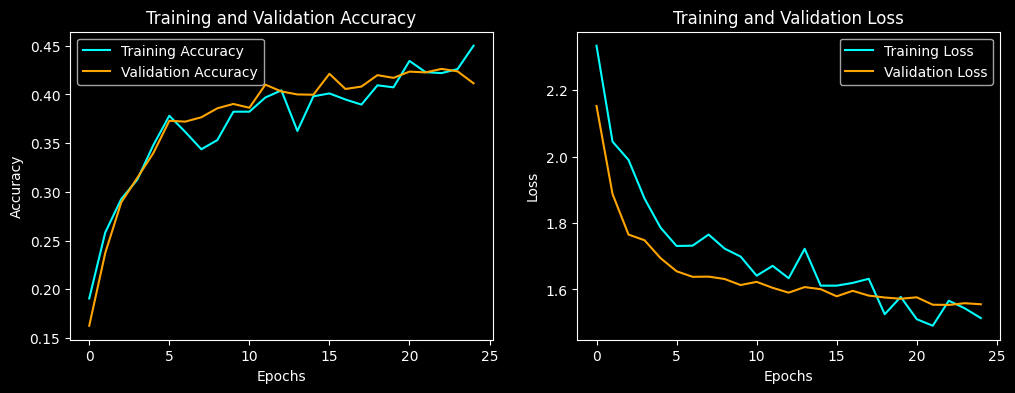

In [40]:
# Define class names (replace these with actual class names if available)
CLASS_NAMES = CLASS_NAMES# Ensure 'class_names' is defined in your code

# Function to plot accuracy and loss curves
def plot_training_curves(history):
    # Use a dark theme
    plt.style.use('dark_background')
    plt.figure(figsize=(12, 4))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='cyan')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss', color='cyan')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.show()

# Call the function to plot curves
plot_training_curves(history)

  3/225 ━━━━━━━━━━━━━━━━━━━━ 13s 61ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


225/225 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step
Classification Report:
               precision    recall  f1-score   support

       angry       0.33      0.24      0.27       958
   disgusted       0.12      0.02      0.03       111
     fearful       0.31      0.06      0.10      1024
       happy       0.47      0.84      0.60      1774
     neutral       0.45      0.22      0.29      1233
         sad       0.39      0.32      0.35      1247
   surprised       0.43      0.75      0.55       831

    accuracy                           0.43      7178
   macro avg       0.36      0.35      0.31      7178
weighted avg       0.40      0.43      0.37      7178



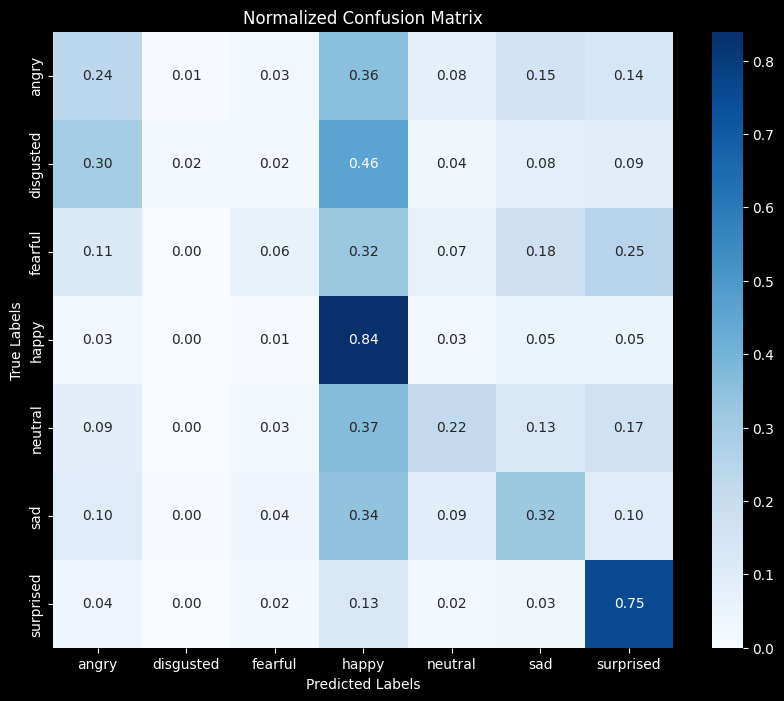

225/225 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - accuracy: 0.3325 - loss: 1.9990
Test Loss: 1.69, Test Accuracy: 0.43


In [41]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict using the test_data generator
Y_pred = model.predict(test_data, steps=test_data.samples // test_data.batch_size + 1)
Y_pred_classes = np.argmax(Y_pred, axis=1)  # Convert probabilities to class indices

# Extract true labels from test_data
Y_true = test_data.classes  # True class indices from the generator
CLASS_NAMES = list(test_data.class_indices.keys())  # Class names from the generator

# Generate a classification report
print("Classification Report:\n", classification_report(Y_true, Y_pred_classes, target_names=CLASS_NAMES))

# Calculate normalized confusion matrix
conf_matrix = confusion_matrix(Y_true, Y_pred_classes, normalize='true')

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES, fmt='.2f')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Normalized Confusion Matrix')
plt.show()

# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_data, steps=test_data.samples // test_data.batch_size + 1)
print(f"Test Loss: {loss:.2f}, Test Accuracy: {accuracy:.2f}")


# GUI Implementation


In [ ]:
import numpy as np
import tensorflow as tf
from PIL import Image
from IPython.display import display, clear_output
import ipywidgets as widgets
import io

# Assuming the following are already defined:
# 1. `model`: Your trained Keras model.
# 2. `CLASS_NAMES`: A list of class names corresponding to your model's output.

# Define the prediction function
def predict_image(img):
    """
    Preprocess the uploaded image and make a prediction using the trained model.
    """
    # Resize the image
    img_resized = img.resize((256, 256))

    # Convert to numpy array and normalize
    img_array = np.array(img_resized).astype('float32') / 255.0

    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    predictions = model.predict(img_array)
    confidence_scores = predictions[0]
    pred_index = np.argmax(confidence_scores)
    pred_class = CLASS_NAMES[pred_index]
    pred_confidence = confidence_scores[pred_index]

    # Update result label
    result_label.value = f"Prediction: {pred_class}\nConfidence: {pred_confidence:.2f}"

# Define widgets
upload_button = widgets.FileUpload(accept='image/*', multiple=False)
result_label = widgets.Label(value="Upload an image to predict.")

def on_upload_change(change):
    """
    Handle the image upload, display it, and predict the class.
    """
    try:
        # Clear previous outputs
        clear_output(wait=True)

        # Display widgets again
        display(widgets.VBox([upload_button, result_label]))

        for file_info in upload_button.value.values():
            # Convert uploaded file content to an image
            image_data = io.BytesIO(file_info['content'])
            img = Image.open(image_data)

            # Display the uploaded image
            display(img)

            # Predict and display results
            predict_image(img)

    except Exception as e:
        result_label.value = f"Error: {str(e)}"

# Attach the handler to the upload button
upload_button.observe(on_upload_change, names='value')

# Display the interface
display(widgets.VBox([upload_button, result_label]))
